In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_defaults()
sns.set_theme(style='whitegrid')

In [162]:
def bench(source, n=2**20, d=1, mode='-m64'):
    res = !g++ {mode} -std=c++17 -O3 -march=native -D N={n} -D D={d} {source}.cc -o run && ./run
    #print(res)
    res = float(res[0].split()[0])
    print(source, n, d, res)
    return res

In [ ]:

ns = list(int(1.17**k) for k in range(50, 100))
inc_res = [bench('inc', n) for n in ns]

In [ ]:
inc_res_boost = [bench('inc', n) for n in ns]

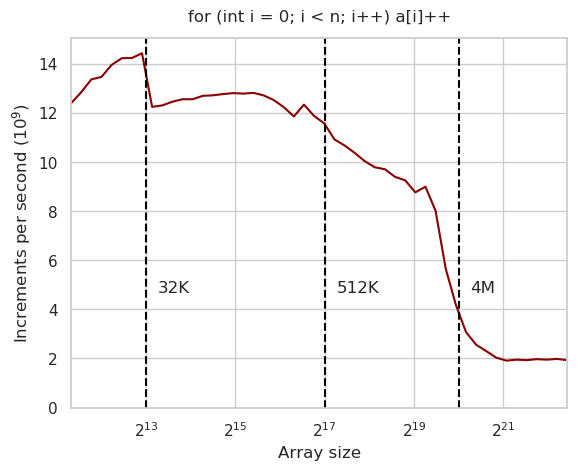

In [243]:
def plot(title=None, ylabel=None, path=None, ch=None, legend=False, ylim=None):
    if ch:
        lines = [
            (2**13, "32K"),
            (2**17, "512K"),
            (2**20, "4M"),
        ]

        for x, t in lines:
            plt.text(x * 1.2, ch, t)
            plt.axvline(x=x, color='black', linestyle='--')

    plt.xscale('log', basex=2)
    plt.xlabel('Array size')

    if ylabel:
        plt.ylabel(ylabel)

    if title:
        plt.title(title, pad=12)

    if legend:
        plt.legend(loc='best')

    plt.ylim(bottom=0, top=ylim)
    plt.margins(0)

    if path:
        fig = plt.gcf()
        fig.savefig(path)
    plt.show()


plt.plot(ns, inc_res, color='darkred')
plot('for (int i = 0; i < n; i++) a[i]++', 'Increments per second ($10^9$)', 'inc.svg', 4.7)

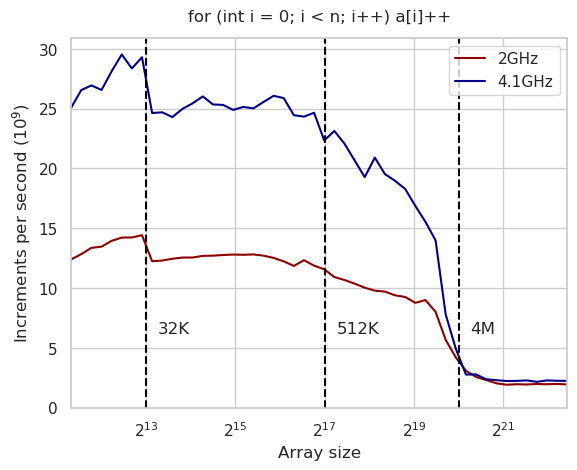

In [45]:
plt.plot(ns, inc_res, color='darkred', label='2GHz')
plt.plot(ns, inc_res_boost, color='darkblue', label='4.1GHz')
plot('for (int i = 0; i < n; i++) a[i]++', 'Increments per second ($10^9$)', 'boost.svg', 6.2, legend=True)

In [46]:
strided16_res = [bench('inc', n, 16) for n in ns]

inc 2566 16 23.31
inc 3002 16 24.08
inc 3512 16 24.88
inc 4110 16 25.87
inc 4808 16 26.08
inc 5626 16 26.59
inc 6582 16 26.54
inc 7701 16 27.31
inc 9011 16 13.51
inc 10543 16 14.88
inc 12335 16 15.03
inc 14432 16 14.99
inc 16885 16 15.16
inc 19756 16 15.37
inc 23115 16 15.44
inc 27044 16 15.37
inc 31642 16 15.45
inc 37021 16 15.44
inc 43315 16 15.58
inc 50678 16 15.62
inc 59293 16 15.61
inc 69373 16 15.23
inc 81167 16 15.57
inc 94965 16 14.83
inc 111110 16 13.72
inc 129998 16 12.95
inc 152098 16 12.53
inc 177955 16 11.64
inc 208207 16 11.08
inc 243603 16 10.52
inc 285015 16 10.13
inc 333468 16 9.84
inc 390158 16 9.57
inc 456485 16 9.46
inc 534087 16 9.41
inc 624882 16 8.8
inc 731112 16 7.99
inc 855401 16 6.98
inc 1000819 16 4.6
inc 1170959 16 3.04
inc 1370022 16 2.46
inc 1602925 16 2.11
inc 1875423 16 2.01
inc 2194245 16 1.98
inc 2567266 16 1.94
inc 3003702 16 1.75
inc 3514331 16 1.67
inc 4111767 16 1.86
inc 4810768 16 1.89
inc 5628599 16 1.92


In [47]:
strided8_res = [bench('inc', n, 8) for n in ns]

inc 2566 8 13.39
inc 3002 8 13.21
inc 3512 8 13.35
inc 4110 8 13.73
inc 4808 8 13.93
inc 5626 8 14.14
inc 6582 8 14.49
inc 7701 8 14.76
inc 9011 8 13.72
inc 10543 8 12.3
inc 12335 8 12.65
inc 14432 8 12.54
inc 16885 8 12.27
inc 19756 8 12.7
inc 23115 8 12.8
inc 27044 8 12.96
inc 31642 8 12.75
inc 37021 8 13.31
inc 43315 8 12.67
inc 50678 8 12.6
inc 59293 8 12.9
inc 69373 8 12.79
inc 81167 8 11.93
inc 94965 8 12.13
inc 111110 8 12.12
inc 129998 8 11.4
inc 152098 8 11.05
inc 177955 8 10.56
inc 208207 8 10.05
inc 243603 8 10.01
inc 285015 8 9.69
inc 333468 8 9.36
inc 390158 8 8.89
inc 456485 8 8.77
inc 534087 8 8.59
inc 624882 8 7.97
inc 731112 8 6.6
inc 855401 8 6.09
inc 1000819 8 4.35
inc 1170959 8 3.12
inc 1370022 8 2.52
inc 1602925 8 2.23
inc 1875423 8 2.24
inc 2194245 8 2.16
inc 2567266 8 2.17
inc 3003702 8 2.15
inc 3514331 8 2.12
inc 4111767 8 2.08
inc 4810768 8 2.12
inc 5628599 8 2.1


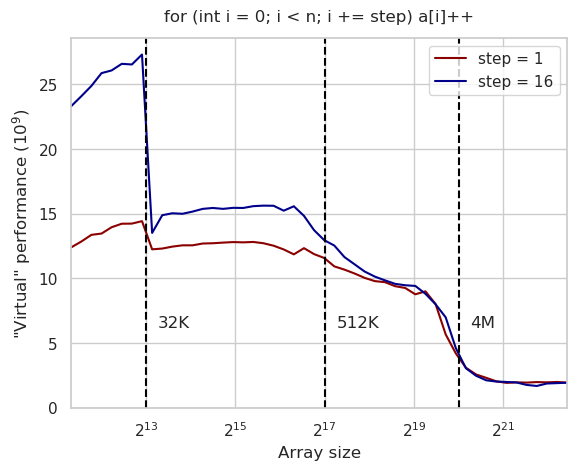

In [53]:
plt.plot(ns, inc_res, color='darkred', label='step = 1')
plt.plot(ns, strided16_res, color='darkblue', label='step = 16')
plot('for (int i = 0; i < n; i += step) a[i]++', '"Virtual" performance ($10^9$)', 'strided.svg', 6.2, legend=True)

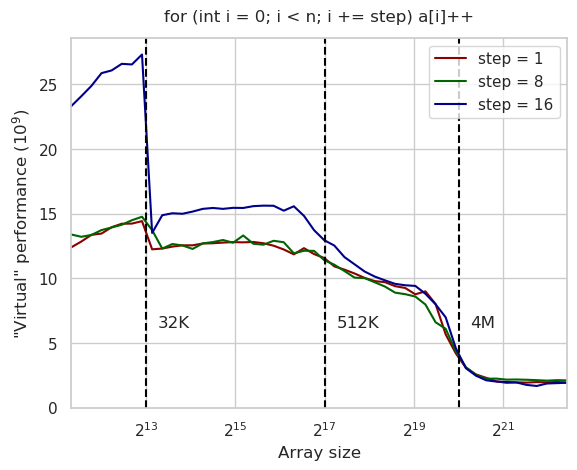

In [56]:
plt.plot(ns, inc_res, color='darkred', label='step = 1')
plt.plot(ns, strided8_res, color='darkgreen', label='step = 8')
plt.plot(ns, strided16_res, color='darkblue', label='step = 16')
plot('for (int i = 0; i < n; i += step) a[i]++', '"Virtual" performance ($10^9$)', 'strided2.svg', 6.2, legend=True)

In [61]:
ds = list(range(16, 1000))
strides_res = [bench('strides', 2**13, d) for d in ds]

strides 8192 16 0.8
strides 8192 17 0.78
strides 8192 18 0.78
strides 8192 19 0.8
strides 8192 20 0.79
strides 8192 21 0.79
strides 8192 22 0.77
strides 8192 23 0.75
strides 8192 24 0.75
strides 8192 25 0.75
strides 8192 26 0.76
strides 8192 27 0.75
strides 8192 28 0.75
strides 8192 29 0.75
strides 8192 30 0.74
strides 8192 31 0.73
strides 8192 32 0.7
strides 8192 33 0.75
strides 8192 34 0.78
strides 8192 35 0.78
strides 8192 36 0.82
strides 8192 37 0.79
strides 8192 38 0.81
strides 8192 39 0.81
strides 8192 40 0.83
strides 8192 41 0.82
strides 8192 42 0.85
strides 8192 43 0.84
strides 8192 44 0.86
strides 8192 45 0.85
strides 8192 46 0.86
strides 8192 47 0.87
strides 8192 48 0.85
strides 8192 49 0.85
strides 8192 50 0.87
strides 8192 51 0.86
strides 8192 52 0.88
strides 8192 53 0.86
strides 8192 54 0.85
strides 8192 55 0.87
strides 8192 56 0.86
strides 8192 57 0.85
strides 8192 58 0.86
strides 8192 59 0.86
strides 8192 60 0.85
strides 8192 61 0.86
strides 8192 62 0.86
strides 8192 63 

In [62]:
ds2 = list(range(1000, 1025))
strides_remaining = [bench('strides', 2**13, d) for d in ds2]

strides 8192 1000 0.15
strides 8192 1001 0.15
strides 8192 1002 0.15
strides 8192 1003 0.15
strides 8192 1004 0.15
strides 8192 1005 0.15
strides 8192 1006 0.15
strides 8192 1007 0.15
strides 8192 1008 0.15
strides 8192 1009 0.15
strides 8192 1010 0.15
strides 8192 1011 0.15
strides 8192 1012 0.15
strides 8192 1013 0.15
strides 8192 1014 0.15
strides 8192 1015 0.15
strides 8192 1016 0.15
strides 8192 1017 0.15
strides 8192 1018 0.15
strides 8192 1019 0.15
strides 8192 1020 0.15
strides 8192 1021 0.15
strides 8192 1022 0.15
strides 8192 1023 0.14
strides 8192 1024 0.04


In [63]:
# this took more than an hour to generate so I'm dumping it
import pickle

strides = strides_res + strides_remaining

with open('strides.pkl', 'wb') as f:
    pickle.dump(strides, f)

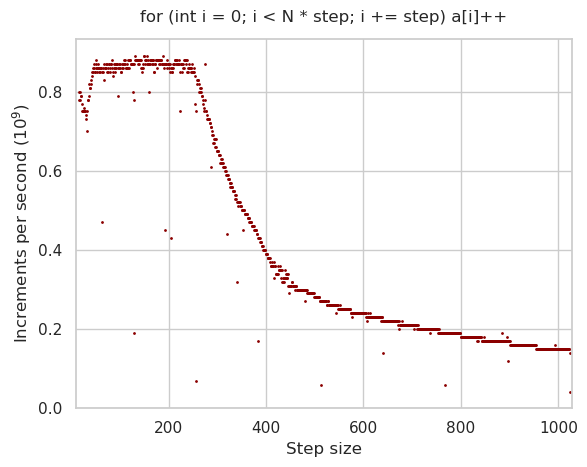

In [123]:
def plot_step(x, y, path, xlabel, normalize=True, s=1):
    plt.scatter(x, y, color='darkred', s=s)

    if False:
        plt.grid(False)

        for x in range(16, 1025, 16):
            plt.axvline(x=x, color='lightgrey', linestyle='-')

    plt.xlabel(xlabel)
    plt.ylabel('Increments per second ($10^9$)')

    plt.title('for (int i = 0; i < N * step; i += step) a[i]++', pad=12)

    plt.ylim(bottom=0)
    plt.margins(0)

    if normalize:
        plt.xlim(left=10, right=1028)
    #plt.xscale('linear', base='256')

    fig = plt.gcf()
    fig.savefig(path)

    plt.show()

plot_step(ds + ds2, strides, 'strides.svg', 'Step size')

In [104]:
ds_two = list(range(64, 2**13 + 1, 64))
#len(ds_two)
strides_two = [bench('strides', 2**13, d) for d in ds_two]

strides 8192 64 0.4689
strides 8192 128 0.1834
strides 8192 192 0.4559
strides 8192 256 0.0674
strides 8192 320 0.4314
strides 8192 384 0.1438
strides 8192 448 0.2886
strides 8192 512 0.0509
strides 8192 576 0.2297
strides 8192 640 0.1309
strides 8192 704 0.1885
strides 8192 768 0.0491
strides 8192 832 0.1666
strides 8192 896 0.1138
strides 8192 960 0.1496
strides 8192 1024 0.0343
strides 8192 1088 0.1405
strides 8192 1152 0.0994
strides 8192 1216 0.1397
strides 8192 1280 0.0464
strides 8192 1344 0.1379
strides 8192 1408 0.1005
strides 8192 1472 0.1383
strides 8192 1536 0.045
strides 8192 1600 0.1373
strides 8192 1664 0.0873
strides 8192 1728 0.1335
strides 8192 1792 0.0451
strides 8192 1856 0.1357
strides 8192 1920 0.0867
strides 8192 1984 0.1471
strides 8192 2048 0.0373
strides 8192 2112 0.1477
strides 8192 2176 0.1013
strides 8192 2240 0.1379
strides 8192 2304 0.0496
strides 8192 2368 0.1343
strides 8192 2432 0.0934
strides 8192 2496 0.1341
strides 8192 2560 0.0478
strides 8192 2624

In [127]:
with open('strides_two.pkl', 'wb') as f:
    pickle.dump(strides_two, f)

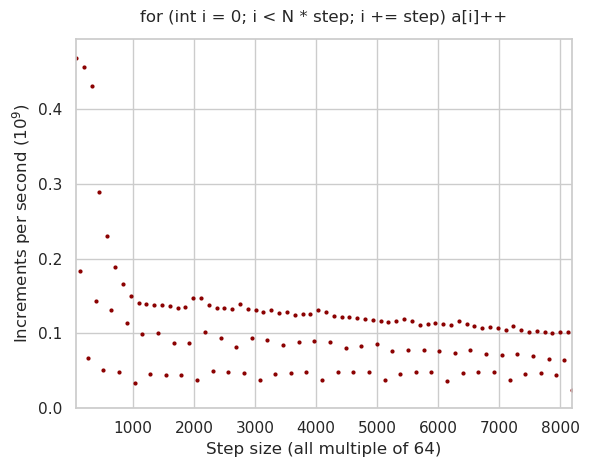

In [126]:
#plt.scatter(ds + ds2, strides, color='darkblue', s=1)
plot_step(ds_two, strides_two, 'strides_two.svg', 'Step size (all multiple of 64)', False, 4)

In [129]:
ns = list(int(1.17**k) for k in range(50, 100))
p = [bench('permutation', n) for n in ns]

permutation 2566 1 3.02
permutation 3002 1 3.46
permutation 3512 1 3.16
permutation 4110 1 3.14
permutation 4808 1 3.14
permutation 5626 1 3.21
permutation 6582 1 3.08
permutation 7701 1 3.27
permutation 9011 1 3.43
permutation 10543 1 4.14
permutation 12335 1 4.61
permutation 14432 1 5.01
permutation 16885 1 5.3
permutation 19756 1 5.58
permutation 23115 1 6.04
permutation 27044 1 6.09
permutation 31642 1 6.46
permutation 37021 1 6.54
permutation 43315 1 6.59
permutation 50678 1 6.73
permutation 59293 1 6.83
permutation 69373 1 7.06
permutation 81167 1 7.56
permutation 94965 1 8.66
permutation 111110 1 10.64
permutation 129998 1 11.35
permutation 152098 1 12.75
permutation 177955 1 14.6
permutation 208207 1 16.9
permutation 243603 1 21.43
permutation 285015 1 26.08
permutation 333468 1 29.39
permutation 390158 1 32.04
permutation 456485 1 38.44
permutation 534087 1 45.0
permutation 624882 1 45.55
permutation 731112 1 59.01
permutation 855401 1 60.98
permutation 1000819 1 71.47
permuta

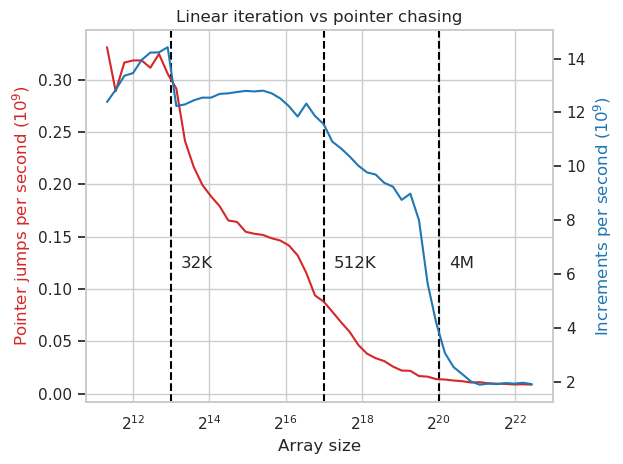

In [147]:
fig, ax1 = plt.subplots()

lines = [
    (2**13, "32K"),
    (2**17, "512K"),
    (2**20, "4M"),
]

for x, t in lines:
    ax1.text(x * 1.2, 0.12, t)
    ax1.axvline(x=x, color='black', linestyle='--')

plt.title('Linear iteration vs pointer chasing')

color = 'tab:red'
ax1.set_xlabel('Array size')
ax1.set_ylabel('Pointer jumps per second ($10^9$)', color=color)
ax1.plot(ns, [1 / x for x in p], color=color)
#ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Increments per second ($10^9$)', color=color)
ax2.plot(ns, inc_res, color=color)
#ax2.tick_params(axis='y', labelcolor=color)

ax2.grid(False)

plt.xscale('log', basex=2)

#plt.ylim(bottom=0)
#plt.margins(0)

fig.tight_layout()
fig.savefig('latency-throughput.svg')

plt.show()

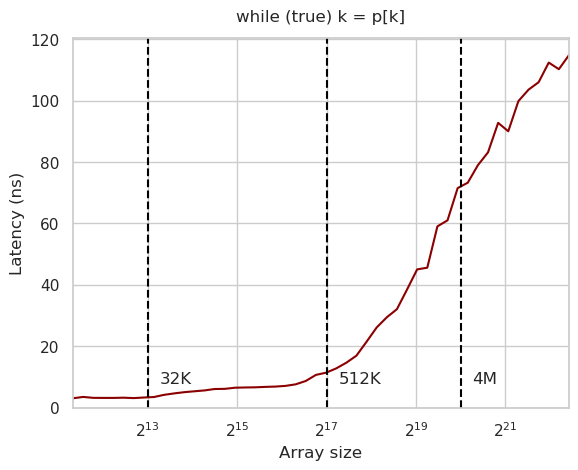

In [203]:
plt.plot(ns, p, color='darkred')
plot('while (true) k = p[k]', 'Latency (ns)', 'permutation-latency.svg', 8)

In [290]:
bench('permutation', n=2**25)

permutation 33554432 1 140.89


140.89

In [263]:
bench('permutation', n=2**25)
# reaches 180 at 0.5G RAM

permutation 33554432 1 145.32


145.32

In [189]:
p64 = [bench('permutation-pointers', n) for n in ns]

permutation-pointers 2566 1 2.01
permutation-pointers 3002 1 2.09
permutation-pointers 3512 1 2.09
permutation-pointers 4110 1 2.18
permutation-pointers 4808 1 2.75
permutation-pointers 5626 1 3.3
permutation-pointers 6582 1 3.71
permutation-pointers 7701 1 4.09
permutation-pointers 9011 1 4.52
permutation-pointers 10543 1 4.72
permutation-pointers 12335 1 5.0
permutation-pointers 14432 1 5.16
permutation-pointers 16885 1 5.39
permutation-pointers 19756 1 5.51
permutation-pointers 23115 1 5.5
permutation-pointers 27044 1 5.74
permutation-pointers 31642 1 5.61
permutation-pointers 37021 1 6.32
permutation-pointers 43315 1 6.88
permutation-pointers 50678 1 8.1
permutation-pointers 59293 1 9.34
permutation-pointers 69373 1 11.89
permutation-pointers 81167 1 13.61
permutation-pointers 94965 1 16.84
permutation-pointers 111110 1 19.75
permutation-pointers 129998 1 21.55
permutation-pointers 152098 1 26.63
permutation-pointers 177955 1 30.23
permutation-pointers 208207 1 34.91
permutation-po

In [190]:
p32 = [bench('permutation-pointers', n, mode='-m32') for n in ns]

permutation-pointers 2566 1 2.01
permutation-pointers 3002 1 2.16
permutation-pointers 3512 1 2.15
permutation-pointers 4110 1 2.15
permutation-pointers 4808 1 2.1
permutation-pointers 5626 1 2.01
permutation-pointers 6582 1 2.13
permutation-pointers 7701 1 2.01
permutation-pointers 9011 1 2.43
permutation-pointers 10543 1 3.39
permutation-pointers 12335 1 3.6
permutation-pointers 14432 1 4.0
permutation-pointers 16885 1 4.33
permutation-pointers 19756 1 4.6
permutation-pointers 23115 1 4.81
permutation-pointers 27044 1 5.05
permutation-pointers 31642 1 5.29
permutation-pointers 37021 1 5.37
permutation-pointers 43315 1 5.52
permutation-pointers 50678 1 5.48
permutation-pointers 59293 1 5.69
permutation-pointers 69373 1 6.27
permutation-pointers 81167 1 6.62
permutation-pointers 94965 1 7.36
permutation-pointers 111110 1 9.3
permutation-pointers 129998 1 10.77
permutation-pointers 152098 1 12.33
permutation-pointers 177955 1 14.74
permutation-pointers 208207 1 17.62
permutation-pointer

In [191]:
bf = [bench('permutation-bitfield', n) for n in ns]

permutation-bitfield 2566 1 6.8
permutation-bitfield 3002 1 6.76
permutation-bitfield 3512 1 6.54
permutation-bitfield 4110 1 6.83
permutation-bitfield 4808 1 6.78
permutation-bitfield 5626 1 6.79
permutation-bitfield 6582 1 6.7
permutation-bitfield 7701 1 6.64
permutation-bitfield 9011 1 6.56
permutation-bitfield 10543 1 6.59
permutation-bitfield 12335 1 7.17
permutation-bitfield 14432 1 7.61
permutation-bitfield 16885 1 8.15
permutation-bitfield 19756 1 8.57
permutation-bitfield 23115 1 8.85
permutation-bitfield 27044 1 9.31
permutation-bitfield 31642 1 9.43
permutation-bitfield 37021 1 9.73
permutation-bitfield 43315 1 9.96
permutation-bitfield 50678 1 9.99
permutation-bitfield 59293 1 10.17
permutation-bitfield 69373 1 10.38
permutation-bitfield 81167 1 10.43
permutation-bitfield 94965 1 10.85
permutation-bitfield 111110 1 12.46
permutation-bitfield 129998 1 13.07
permutation-bitfield 152098 1 14.57
permutation-bitfield 177955 1 16.23
permutation-bitfield 208207 1 17.67
permutation

In [192]:
bf2 = [bench('permutation-bitfield2', n) for n in ns]

permutation-bitfield2 2566 1 4.47
permutation-bitfield2 3002 1 4.17
permutation-bitfield2 3512 1 4.24
permutation-bitfield2 4110 1 4.22
permutation-bitfield2 4808 1 4.07
permutation-bitfield2 5626 1 4.05
permutation-bitfield2 6582 1 4.15
permutation-bitfield2 7701 1 4.1
permutation-bitfield2 9011 1 4.22
permutation-bitfield2 10543 1 4.22
permutation-bitfield2 12335 1 4.7
permutation-bitfield2 14432 1 5.12
permutation-bitfield2 16885 1 5.74
permutation-bitfield2 19756 1 6.11
permutation-bitfield2 23115 1 6.49
permutation-bitfield2 27044 1 6.81
permutation-bitfield2 31642 1 7.14
permutation-bitfield2 37021 1 7.21
permutation-bitfield2 43315 1 7.35
permutation-bitfield2 50678 1 7.49
permutation-bitfield2 59293 1 7.6
permutation-bitfield2 69373 1 7.66
permutation-bitfield2 81167 1 7.68
permutation-bitfield2 94965 1 8.13
permutation-bitfield2 111110 1 8.83
permutation-bitfield2 129998 1 9.75
permutation-bitfield2 152098 1 10.71
permutation-bitfield2 177955 1 13.14
permutation-bitfield2 2082

In [188]:
bench('permutation', n=2**20)
bench('permutation-pointers', n=2**20)
bench('permutation-pointers', n=2**20, mode='-m32')
bench('permutation-bitfield', n=2**20)
bench('permutation-bitfield2', n=2**20)

permutation 1048576 1 72.26
permutation-pointers 1048576 1 95.76
permutation-pointers 1048576 1 74.04
permutation-bitfield 1048576 1 63.61
permutation-bitfield2 1048576 1 56.02


56.02

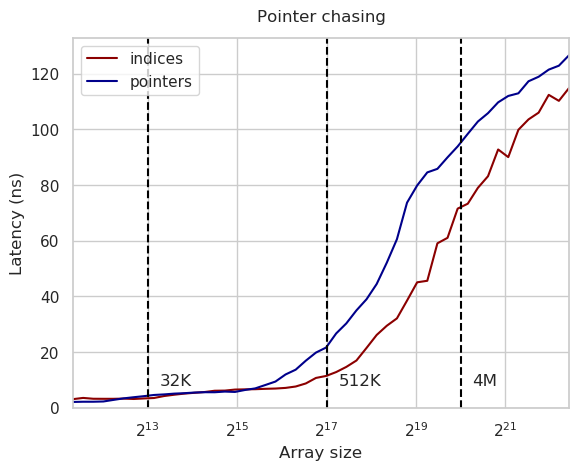

In [205]:
plt.plot(ns, p, color='darkred', label='indices')
plt.plot(ns, p64, color='darkblue', label='pointers')
plot('Pointer chasing', 'Latency (ns)', 'permutation-p64.svg', 8, legend=True)

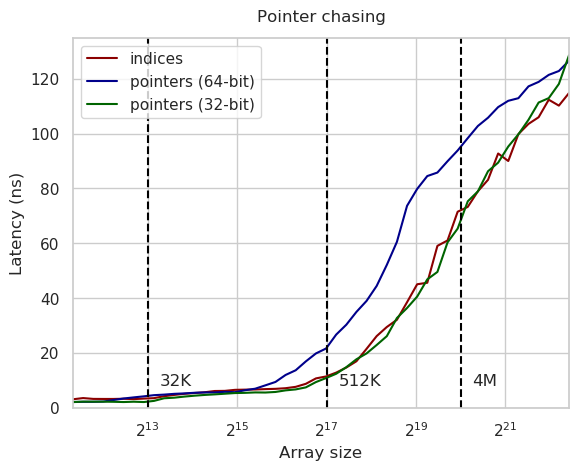

In [213]:
plt.plot(ns, p, color='darkred', label='indices')
plt.plot(ns, p64, color='darkblue', label='pointers (64-bit)')
plt.plot(ns, p32, color='darkgreen', label='pointers (32-bit)')
plot('Pointer chasing', 'Latency (ns)', 'permutation-p32.svg', 8, legend=True)

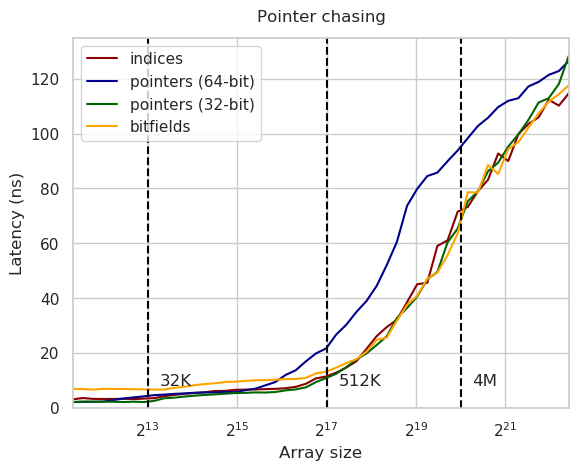

In [215]:
plt.plot(ns, p, color='darkred', label='indices')
plt.plot(ns, p64, color='darkblue', label='pointers (64-bit)')
plt.plot(ns, p32, color='darkgreen', label='pointers (32-bit)')
plt.plot(ns, bf, color='orange', label='bitfields')
plot('Pointer chasing', 'Latency (ns)', 'permutation-bf.svg', 8, legend=True)

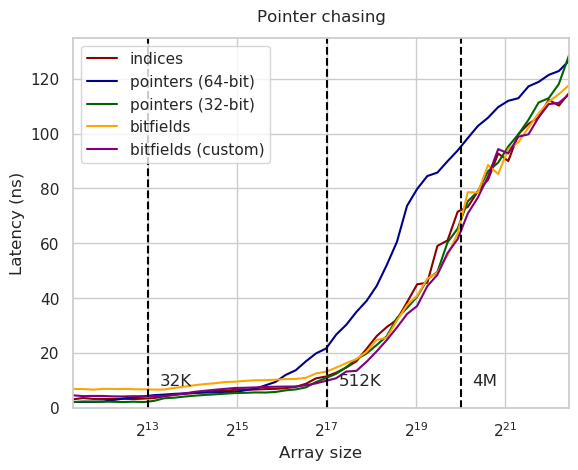

In [216]:
plt.plot(ns, p, color='darkred', label='indices')
plt.plot(ns, p64, color='darkblue', label='pointers (64-bit)')
plt.plot(ns, p32, color='darkgreen', label='pointers (32-bit)')
plt.plot(ns, bf, color='orange', label='bitfields')
plt.plot(ns, bf2, color='purple', label='bitfields (custom)')
plot('Pointer chasing', 'Latency (ns)', 'permutation-bf-custom.svg', 8, legend=True)

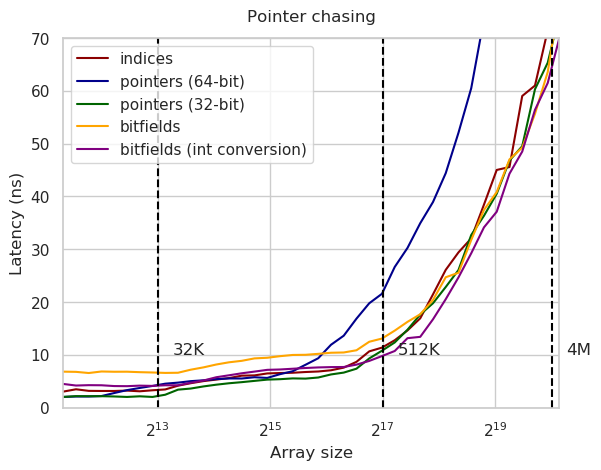

In [252]:
#lim = 30
plt.plot(ns, p, color='darkred', label='indices')
plt.plot(ns, p64, color='darkblue', label='pointers (64-bit)')
plt.plot(ns, p32, color='darkgreen', label='pointers (32-bit)')
plt.plot(ns, bf, color='orange', label='bitfields')
plt.plot(ns, bf2, color='purple', label='bitfields (int conversion)')
plt.xlim(left=ns[0], right=2**20 * 1.1)
plot('Pointer chasing', 'Latency (ns)', 'permutation-final-zoom.svg', 10, legend=True, ylim=70)

In [264]:
hw = [bench('hw-prefetch', n) for n in ns]

hw-prefetch 2566 1 3.06
hw-prefetch 3002 1 3.02
hw-prefetch 3512 1 3.02
hw-prefetch 4110 1 3.09
hw-prefetch 4808 1 3.15
hw-prefetch 5626 1 3.04
hw-prefetch 6582 1 3.13
hw-prefetch 7701 1 3.17
hw-prefetch 9011 1 3.2
hw-prefetch 10543 1 3.02
hw-prefetch 12335 1 3.07
hw-prefetch 14432 1 3.05
hw-prefetch 16885 1 3.13
hw-prefetch 19756 1 3.16
hw-prefetch 23115 1 3.15
hw-prefetch 27044 1 3.02
hw-prefetch 31642 1 3.14
hw-prefetch 37021 1 3.06
hw-prefetch 43315 1 3.12
hw-prefetch 50678 1 3.02
hw-prefetch 59293 1 3.03
hw-prefetch 69373 1 3.03
hw-prefetch 81167 1 3.01
hw-prefetch 94965 1 3.14
hw-prefetch 111110 1 3.1
hw-prefetch 129998 1 3.1
hw-prefetch 152098 1 3.11
hw-prefetch 177955 1 3.07
hw-prefetch 208207 1 3.2
hw-prefetch 243603 1 3.08
hw-prefetch 285015 1 3.02
hw-prefetch 333468 1 3.08
hw-prefetch 390158 1 3.08
hw-prefetch 456485 1 3.05
hw-prefetch 534087 1 3.05
hw-prefetch 624882 1 3.03
hw-prefetch 731112 1 3.03
hw-prefetch 855401 1 3.02
hw-prefetch 1000819 1 3.03
hw-prefetch 1170959 1 

In [266]:
sw = [bench('sw-prefetch', n) for n in ns]

sw-prefetch 2566 1 7.11
sw-prefetch 3002 1 7.11
sw-prefetch 3512 1 7.08
sw-prefetch 4110 1 7.02
sw-prefetch 4808 1 7.04
sw-prefetch 5626 1 7.21
sw-prefetch 6582 1 7.03
sw-prefetch 7701 1 7.14
sw-prefetch 9011 1 7.12
sw-prefetch 10543 1 7.03
sw-prefetch 12335 1 7.16
sw-prefetch 14432 1 7.18
sw-prefetch 16885 1 7.17
sw-prefetch 19756 1 7.23
sw-prefetch 23115 1 7.2
sw-prefetch 27044 1 7.13
sw-prefetch 31642 1 7.13
sw-prefetch 37021 1 7.17
sw-prefetch 43315 1 7.41
sw-prefetch 50678 1 7.24
sw-prefetch 59293 1 7.3
sw-prefetch 69373 1 7.19
sw-prefetch 81167 1 8.22
sw-prefetch 94965 1 7.99
sw-prefetch 111110 1 9.43
sw-prefetch 129998 1 9.4
sw-prefetch 152098 1 11.28
sw-prefetch 177955 1 10.37
sw-prefetch 208207 1 12.03
sw-prefetch 243603 1 14.9
sw-prefetch 285015 1 17.0
sw-prefetch 333468 1 10.87
sw-prefetch 390158 1 11.31
sw-prefetch 456485 1 21.96
sw-prefetch 534087 1 26.09
sw-prefetch 624882 1 29.71
sw-prefetch 731112 1 39.96
sw-prefetch 855401 1 32.61
sw-prefetch 1000819 1 40.78
sw-prefetc

In [267]:
sw2 = [bench('sw-prefetch', n, 2) for n in ns]
sw3 = [bench('sw-prefetch', n, 3) for n in ns]
sw4 = [bench('sw-prefetch', n, 4) for n in ns]
sw8 = [bench('sw-prefetch', n, 8) for n in ns]

sw-prefetch 2566 2 7.3
sw-prefetch 3002 2 7.3
sw-prefetch 3512 2 7.44
sw-prefetch 4110 2 7.14
sw-prefetch 4808 2 7.24
sw-prefetch 5626 2 7.22
sw-prefetch 6582 2 7.37
sw-prefetch 7701 2 7.26
sw-prefetch 9011 2 7.08
sw-prefetch 10543 2 7.15
sw-prefetch 12335 2 7.28
sw-prefetch 14432 2 7.39
sw-prefetch 16885 2 7.19
sw-prefetch 19756 2 7.3
sw-prefetch 23115 2 7.38
sw-prefetch 27044 2 7.38
sw-prefetch 31642 2 7.4
sw-prefetch 37021 2 7.21
sw-prefetch 43315 2 7.29
sw-prefetch 50678 2 7.42
sw-prefetch 59293 2 7.28
sw-prefetch 69373 2 7.27
sw-prefetch 81167 2 7.55
sw-prefetch 94965 2 7.49
sw-prefetch 111110 2 7.85
sw-prefetch 129998 2 8.06
sw-prefetch 152098 2 9.11
sw-prefetch 177955 2 9.35
sw-prefetch 208207 2 10.22
sw-prefetch 243603 2 13.11
sw-prefetch 285015 2 12.62
sw-prefetch 333468 2 9.41
sw-prefetch 390158 2 9.21
sw-prefetch 456485 2 15.74
sw-prefetch 534087 2 18.15
sw-prefetch 624882 2 18.08
sw-prefetch 731112 2 19.8
sw-prefetch 855401 2 23.45
sw-prefetch 1000819 2 29.11
sw-prefetch 11

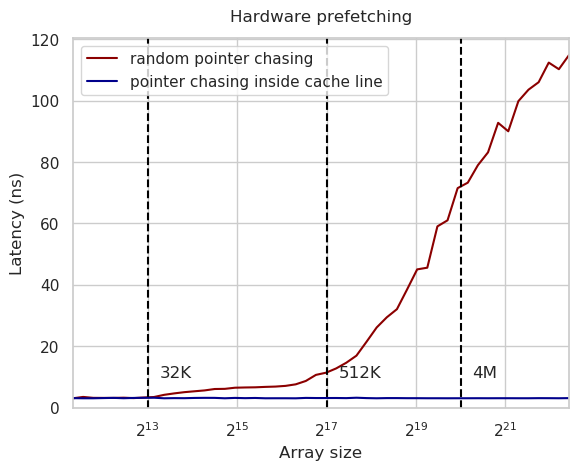

In [268]:
plt.plot(ns, p, color='darkred', label='random pointer chasing')
plt.plot(ns, hw, color='darkblue', label='pointer chasing inside cache line')
plot('Hardware prefetching', 'Latency (ns)', 'sw-prefetch.svg', 10, legend=True)

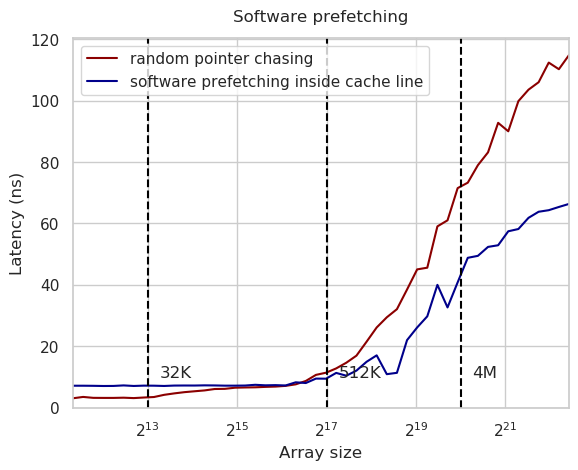

In [270]:
plt.plot(ns, p, color='darkred', label='random pointer chasing')
plt.plot(ns, sw, color='darkblue', label='software prefetching inside cache line')
plot('Software prefetching', 'Latency (ns)', 'sw-prefetch.svg', 10, legend=True)

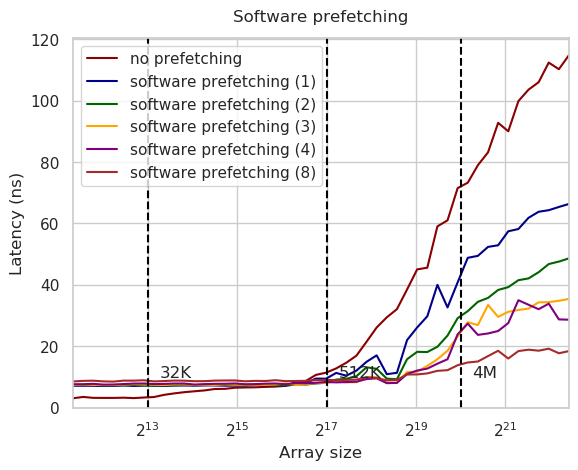

In [272]:
plt.plot(ns, p, color='darkred', label='no prefetching')
plt.plot(ns, sw, color='darkblue', label='software prefetching (1)')
plt.plot(ns, sw2, color='darkgreen', label='software prefetching (2)')
plt.plot(ns, sw3, color='orange', label='software prefetching (3)')
plt.plot(ns, sw4, color='purple', label='software prefetching (4)')
plt.plot(ns, sw8, color='brown', label='software prefetching (8)')
plot('Software prefetching', 'Latency (ns)', 'sw-prefetch-others.svg', 10, legend=True)

In [287]:
bench('strides', n=2**13, d=123)
bench('hugepages', n=2**13, d=123)

strides 8192 123 0.8637
hugepages 8192 123 0.8579


0.8579